In [1]:
pwd

'/Users/rachelbittner/Documents/repos/continuousf0eval/notebooks'

In [2]:
import numpy as np
import pylab as plt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import metrics

In [6]:
# create artificial situations

# create note that fades out
def create_reference_example():
    t = np.linspace(0,1,100)
    ref_pitch = np.zeros_like(t)
    ref_pitch[0:25] = 440  + 10 * np.sin(2*np.pi*8*t[0:25])
    ref_pitch[50:100] = 330  + 8 * np.sin(2*np.pi*8*t[50:100])

    decay_len = 30
    ref_conf = np.ones_like(t)
    ref_conf[-decay_len:] = np.linspace(1,0.01,decay_len) **2
    ref_conf[ref_pitch == 0] = 0
    return t, ref_pitch, ref_conf

In [7]:
ref_times, ref_freqs, ref_conf = create_reference_example()

In [8]:
import seaborn as sns

In [9]:
def identity_estimator(t, pitch, conf):
    return t, pitch, conf

def perfect_pitch_perfect_confidence(t, pitch):
    conf = np.ones_like(t)
    conf[pitch==0] = 0
    return t, pitch, conf

def perfect_pitch_high_confidence(t, pitch):
    conf = np.ones_like(t) * 0.8
    conf[pitch==0] = 0.2
    return t, pitch, conf

def perfect_pitch_low_confidence(t, pitch):
    conf = np.ones_like(t) * 0.2
    conf[pitch==0] = 0.1
    return t, pitch, conf


def wrong_pitch_low_confidence(t, pitch):
    conf = np.ones_like(t) * 0.2
    est_pitch = pitch / 3
    pitch[40:50] = 300  + 10 * np.sin(2*np.pi*8*t[40:50])

    conf[pitch==0] = 0
    return t, est_pitch, conf

def wrong_pitch_perfect_confidence(t, pitch):
    conf = np.ones_like(t)
    est_pitch = pitch / 3
    conf[pitch==0] = 0
    return t, est_pitch, conf
    

In [44]:
def get_title(ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf):
    sc = metrics.evaluate(ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf)
    title = "OA: {oa:0.2f}, RPA: {rpa:0.2f},\nVR: {vr:0.2f}, VFA: {vfa:0.2f}, ".format(
    oa=sc['Overall Accuracy'], rpa=sc['Raw Pitch Accuracy'],
    vr = sc['Voicing Recall'], vfa = sc['Voicing False Alarm'])
    return title

def add_subplot(row, col, pos, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf,
                ylab=False, ytick=False):
    ax = plt.subplot(row, col, pos)
    ax.yaxis.tick_right()
    if not ytick:
        plt.yticks([], [])

    plt.plot(ref_times, ref_freqs, '.k', label='Active\nFreq.', markersize = 15)
    plt.plot(ref_times, est_freqs, '.r', label='Est\nFreq.')

    plt.ylim([min(ref_freqs)-10, max(ref_freqs)*1.2])
    plt.xticks([], [])
    if ylab:
        plt.ylabel("Freq (Hz)")
    plt.title(get_title(ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf))

    ax = plt.subplot(row, col, pos+col)
    plt.plot(ref_times, ref_conf * (ref_freqs > 0).astype('float'), '-k', linewidth=5, label='Conf.')
    plt.plot(ref_times, est_conf, '-r', linewidth=2, label='Est.\nConf.')
    plt.ylim([-0, 1.1])

    if ylab:
        plt.ylabel("Conf")
    ax.yaxis.tick_right()
    if not ytick:
        plt.yticks([], [])
    plt.xlabel("Time (sec)")


In [50]:
from matplotlib.lines import Line2D

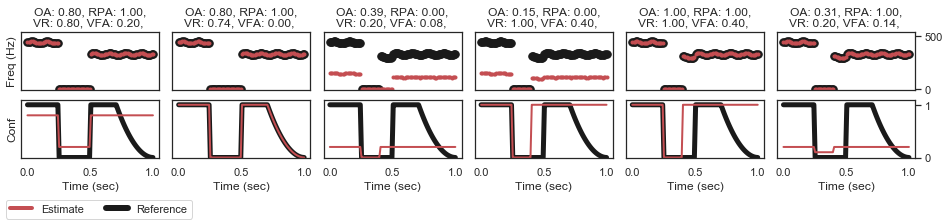

In [74]:
ref_times, ref_freqs, ref_conf = create_reference_example()

custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='k', lw=6)]
custom_lab = ['Estimate', 'Reference']

fig = plt.figure(figsize=(13, 3))
sns.set(font_scale=1.0)
sns.set_style('white')

est_times, est_freqs, est_conf = perfect_pitch_high_confidence(ref_times, ref_freqs)
add_subplot(2, 6, 1, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf, ylab=True)

est_times, est_freqs, est_conf = identity_estimator(ref_times, ref_freqs, ref_conf)
add_subplot(2, 6, 2, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf)

est_times, est_freqs, est_conf = wrong_pitch_low_confidence(ref_times, ref_freqs)
add_subplot(2, 6, 3, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf)

est_times, est_freqs, est_conf = wrong_pitch_perfect_confidence(ref_times, ref_freqs)
add_subplot(2, 6, 4, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf)

est_times, est_freqs, est_conf = perfect_pitch_perfect_confidence(ref_times, ref_freqs)
add_subplot(2, 6, 5, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf)

est_times, est_freqs, est_conf = perfect_pitch_low_confidence(ref_times, ref_freqs)
add_subplot(2, 6, 6, ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf, ytick=True)

fig.legend(custom_lines, custom_lab, ncol=2, loc=3)

plt.tight_layout(pad=0.0, w_pad=0.1)
fig.subplots_adjust(bottom=0.3)
plt.savefig("../paper-figs/toy_ex.pdf", fmt='pdf', bbox_inches="tight")

In [57]:
# def plot_metrics(ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf):
#     sc = metrics.evaluate(ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf)

#     fig = plt.figure(figsize=(5, 3))
#     sns.set(font_scale=1.2)
#     sns.set_style('white')
#     ax = plt.subplot(211)
#     #     plt.title("Frequency")
#     ax.yaxis.tick_right()

#     plt.plot(ref_times, ref_freqs, '.k', label='Active\nFreq.', markersize = 15)
#     plt.plot(ref_times, est_freqs, '.r', label='Est\nFreq.')


#     plt.ylim([min(ref_freqs)-10, max(ref_freqs)*1.2])
#     plt.xticks([], [])
#     plt.ylabel("Freq (Hz)")
#     plt.title("OA: {oa:0.2f}, RPA: {rpa:0.2f}, VR: {vr:0.2f}, VFA: {vfa:0.2f}, ".format(oa=sc['Overall Accuracy'], rpa=sc['Raw Pitch Accuracy'], vr = sc['Voicing Recall'], vfa = sc['Voicing False Alarm'], ))

#     # fo as dots, conference as

#     ax = plt.subplot(212)
#     #     plt.title("Estimated Confidence")
#     plt.plot(ref_times, ref_conf * (ref_freqs > 0).astype('float'), '-k', linewidth=5, label='Conf.')
#     plt.plot(ref_times, est_conf, '-r', linewidth=2, label='Est.\nConf.')
#     plt.ylim([-0, 1.1])
#     scores_new = {}


#     plt.ylabel("Conf")
#     ax.yaxis.tick_right()

#     plt.xlabel("Time (sec)")
#     plt.tight_layout()

#     fig.legend(ncol=4, loc=3, mode='expand')

#     plt.tight_layout()
#     fig.subplots_adjust(bottom=0.4)

# plt.savefig("../paper-figs/confidence_ex.pdf", fmt='pdf', bbox_inches=None)


/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in subtract
  return np.abs(freq_diff_semitones - octave) < tolerance
/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in less
  return np.abs(freq_diff_semitones - octave) < tolerance


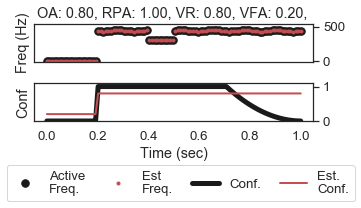

In [58]:
est_times, est_freqs, est_conf = perfect_pitch_high_confidence(ref_times, ref_freqs)
sc = plot_metrics(ref_times, ref_freqs, ref_conf, est_times, est_freqs, est_conf)

/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in subtract
  return np.abs(freq_diff_semitones - octave) < tolerance
/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in less
  return np.abs(freq_diff_semitones - octave) < tolerance


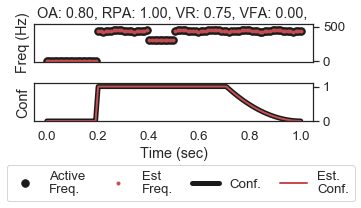

In [60]:
est_times, est_freqs, est_conf = identity_estimator(ref_times, ref_freqs, ref_conf)
plot_metrics(ref_times, ref_freqs, ref_conf,est_times, est_freqs, est_conf)


/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in subtract
  return np.abs(freq_diff_semitones - octave) < tolerance
/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in less
  return np.abs(freq_diff_semitones - octave) < tolerance


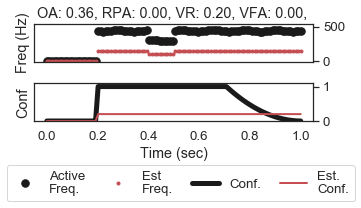

In [61]:
est_times, est_freqs, est_conf = wrong_pitch_low_confidence(ref_times, ref_freqs)
plot_metrics(ref_times, ref_freqs, ref_conf,est_times, est_freqs, est_conf)


In [62]:
def voicing_recall(ref_voicing, est_voicing):
    ref_indicator = (ref_voicing > 0).astype(float)
    return np.sum(est_voicing * ref_indicator) / np.sum(ref_indicator)

In [63]:
voicing_recall(ref_conf,est_conf)

0.19999999999999996

In [64]:
def create_single_note_example():
    t = np.linspace(0,1,100)
    ref_pitch = np.zeros_like(t)
    ref_pitch = 440  + 10 * np.sin(2*np.pi*8*t)
    ref_pitch[0:20] = 0
    decay_len = 30
    ref_conf = np.ones_like(t)
    ref_conf[-decay_len:] = np.linspace(1,0.01,decay_len) **2
    ref_conf[ref_pitch == 0] = 0
    return t, ref_pitch, ref_conf

ref_times, ref_freqs, ref_conf = create_single_note_example()

/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in subtract
  return np.abs(freq_diff_semitones - octave) < tolerance
/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in less
  return np.abs(freq_diff_semitones - octave) < tolerance


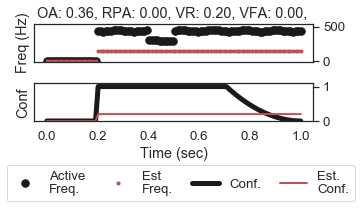

In [65]:
est_times, est_freqs, est_conf = wrong_pitch_low_confidence(ref_times, ref_freqs)
plot_metrics(ref_times, ref_freqs, ref_conf,est_times, est_freqs, est_conf)


/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in subtract
  return np.abs(freq_diff_semitones - octave) < tolerance
/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in less
  return np.abs(freq_diff_semitones - octave) < tolerance


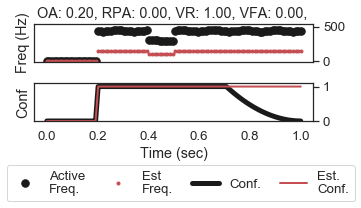

In [66]:
est_times, est_freqs, est_conf = wrong_pitch_perfect_confidence(ref_times, ref_freqs)
plot_metrics(ref_times, ref_freqs, ref_conf,est_times, est_freqs, est_conf)



/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in subtract
  return np.abs(freq_diff_semitones - octave) < tolerance
/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in less
  return np.abs(freq_diff_semitones - octave) < tolerance


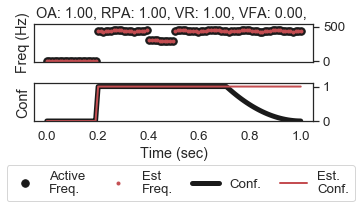

In [67]:
est_times, est_freqs, est_conf = perfect_pitch_perfect_confidence(ref_times, ref_freqs)
plot_metrics(ref_times, ref_freqs, ref_conf,est_times, est_freqs, est_conf)



/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in subtract
  return np.abs(freq_diff_semitones - octave) < tolerance
/Users/juanjoseb/code/continuousf0eval/notebooks/metrics.py:47: RuntimeWarning: invalid value encountered in less
  return np.abs(freq_diff_semitones - octave) < tolerance


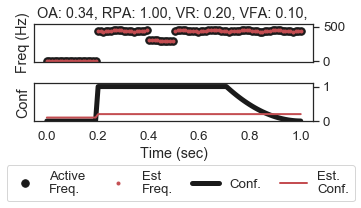

In [68]:
est_times, est_freqs, est_conf = perfect_pitch_low_confidence(ref_times, ref_freqs)
plot_metrics(ref_times, ref_freqs, ref_conf,est_times, est_freqs, est_conf)

